<bound method NDFrame.head of        Bearing 1 x  Bearing 1 y  Bearing 2 x  Bearing 2 y  Bearing 3 x   
0           -0.022       -0.039       -0.183       -0.054       -0.105  \
1           -0.105       -0.017       -0.164       -0.183       -0.049   
2           -0.183       -0.098       -0.195       -0.125       -0.005   
3           -0.178       -0.161       -0.159       -0.178       -0.100   
4           -0.208       -0.129       -0.261       -0.098       -0.151   
...            ...          ...          ...          ...          ...   
20475       -0.022       -0.142        0.085       -0.078       -0.200   
20476        0.024       -0.156        0.042       -0.039       -0.159   
20477       -0.193       -0.303       -0.071       -0.125       -0.237   
20478       -0.115        0.076       -0.078       -0.332       -0.027   
20479       -0.042        0.098        0.103       -0.059       -0.002   

       Bearing 3 y  Bearing 4 x  Bearing 4 y  
0           -0.134       -0.129   

<Axes: >

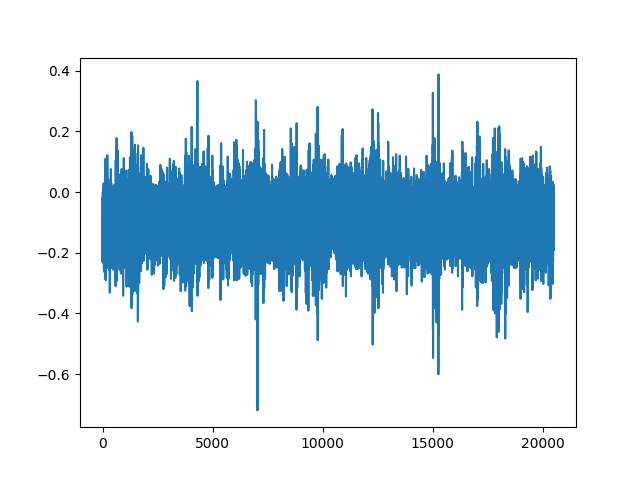

In [103]:
%matplotlib widget
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append("..")       # to make the upper folder visible
import src

# folder path
dirPath = "../data/raw/1st_test_IMSBearing/"
fileName = "2003.10.22.12.06.24"

snap1=src.data.snapshot()
snap1.readImsFile(path=dirPath+fileName)
print(snap1.rawData.head)
#ax=snap1.rawData.plot(y='Bearing 1 x',legend=False)
#ax.grid(which='major', color='#444',linestyle='--')


In [113]:
dummy=src.data.snapshot()
dummy.readImsFile(path=dirPath+fileName)
#print(f"the dataframe has {len(dummy.index)} rows")
#print(dummy.rawData.head)